In [74]:
import tensorflow as tf
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [75]:
img = image.load_img("C:/Users/ksbal/Desktop/CodeBasicML/PetImages/Train/Dog/4.jpg")

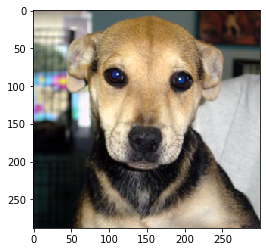

In [88]:
plt.imshow(img)

In [77]:
cv2.imread("C:/Users/ksbal/Desktop/CodeBasicML/PetImages/Train/Dog/4.jpg").shape

(288, 300, 3)

In [78]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

In [79]:
train_dataset = train.flow_from_directory("C:/Users/ksbal/Desktop/CodeBasicML/PetImages/Train/",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary'
                                         )

Found 7999 images belonging to 2 classes.


In [87]:
train_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [81]:
test_dataset = test.flow_from_directory("C:/Users/ksbal/Desktop/CodeBasicML/PetImages/Test/",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary'
                                         )

Found 1000 images belonging to 2 classes.


In [82]:
test_dataset.class_indices

{'Cat': 0, 'Dog': 1}

In [83]:
model = keras.Sequential()

In [84]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))


model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation='relu'))

model.add(keras.layers.Dense(1,activation='sigmoid'))


In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [86]:
#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
       
         )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 250 steps, validate for 32 steps
Epoch 1/10
250/250 [==============================] - 155s 622ms/step - loss: 0.6694 - accuracy: 0.5771 - val_loss: 0.6526 - val_accuracy: 0.6040
Epoch 2/10
250/250 [==============================] - 149s 594ms/step - loss: 0.6123 - accuracy: 0.6545 - val_loss: 0.5669 - val_accuracy: 0.6960
Epoch 3/10
250/250 [==============================] - 153s 613ms/step - loss: 0.5208 - accuracy: 0.7411 - val_loss: 0.4534 - val_accuracy: 0.7860
Epoch 4/10
250/250 [==============================] - 155s 619ms/step - loss: 0.4481 - accuracy: 0.7920 - val_loss: 0.4285 - val_accuracy: 0.8010
Epoch 5/10
250/250 [==============================] - 157s 627ms/step - loss: 0.3861 - accuracy: 0.8209 - val_loss: 0.4195 - val_accuracy: 0.8050
Epoch 6/10
250/250 [==============================] - 156s 624ms/step - loss: 0.3217 - accuracy: 0.8632 - val_loss: 0.4069 - val_accuracy: 0.8280
Epoch 7/10
250/250 [===========

In [279]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("DOG",fontsize=30)
        
    
    elif val == 0:
        
        plt.xlabel("CAT",fontsize=30)

    
    
    

[[1.]]


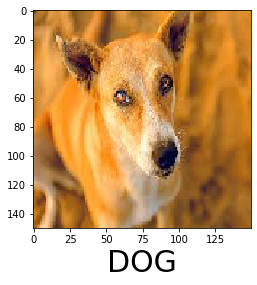

In [280]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\TestCatAndDogs\8.jpeg")

[[0.]]


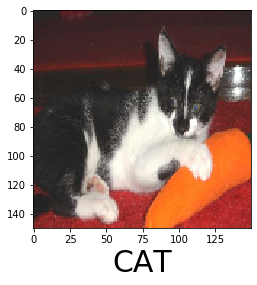

In [281]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Cat\4501.jpg")

[[0.]]


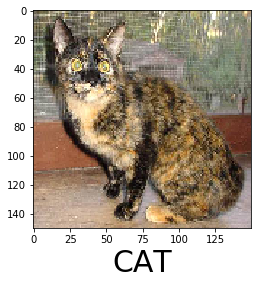

In [282]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Cat\4521.jpg")

[[0.]]


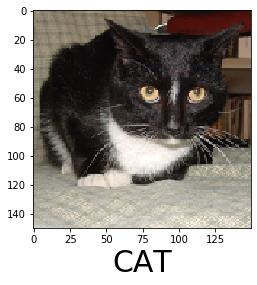

In [283]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Cat\4541.jpg")

[[1.]]


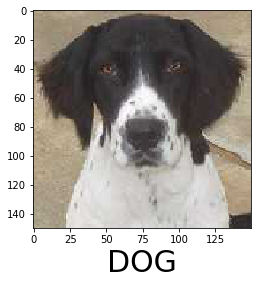

In [284]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Dog\4509.jpg")

[[1.]]


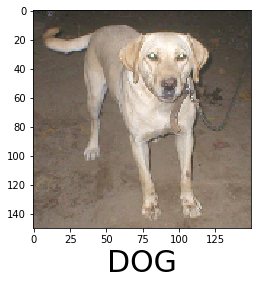

In [285]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Dog\4514.jpg")

[[0.]]


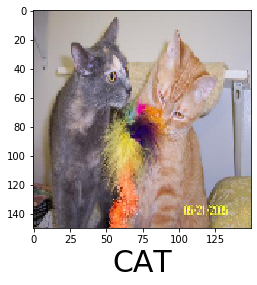

In [286]:
predictImage(r"C:\Users\ksbal\Desktop\CodeBasicML\NeuralNetwork\Cat\4660.jpg")

In [289]:
model.layers